# Outlier Aware Histogram in Python

I wrote this because I was looking at datasets with a few outliers that were really throwing off the histograms I was drawing. Idea from Edwin Thoen @ https://edwinth.github.io/blog/outlier-bin/.

In [128]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


First, we generate some data from a standard normal and then add some outliers of varying scales.

In [127]:
data = np.random.normal(size=1000)
data = np.append(data, [5, 25, 50, 100, 150, -5, -25, -50, -100, -150])


What happens if we naively try to plot the data.

(array([ 1.,  0.,  0., ...,  0.,  0.,  1.]),
 array([-150.        , -149.73614776, -149.47229551, ...,  149.47229551,
         149.73614776,  150.        ]),
 <a list of 1137 Patch objects>)

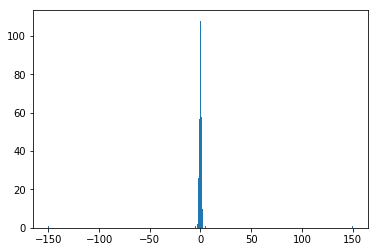

In [129]:
plt.hist(data, bins='auto')


The plotting code is below, but first I want a way to programatically define outliers. I borrowed code from a number of SO answers (including https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting) to use a robust estimator for the standard deviation to test for outliers (explanation https://www.pdf-archive.com/2016/07/29/outlier-methods-external/outlier-methods-external.pdf). The function `calculate_bounds` returns the bounds between which the data are not likely outliers.

In [130]:
def mad(data):
    median = np.median(data)
    diff = np.abs(data - median)
    mad = np.median(diff)
    return mad

mad(data)


0.66207622511039554

In [131]:
def calculate_bounds(data, z_thresh=3.5):
    MAD = mad(data)
    median = np.median(data)
    const = z_thresh * MAD / 0.6745
    return (median - const, median + const)

calculate_bounds(data)


(-3.3959667236959765, 3.4750986221494928)

We can use this function to limit our histogram's range to drop outliers, but this throws away data that might be significant.

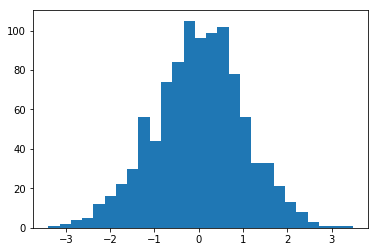

In [132]:
n, bins, patches = plt.hist(data, bins='auto', range=calculate_bounds(data))


Below is a function to include all the data points in a histogram, but to note where the outliers fall in the extreme bins. You can add your own bounds, or use the automatic outlier detection.

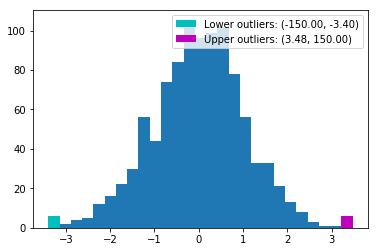

In [133]:
def outlier_aware_hist(data, lower=None, upper=None):
    if not lower or lower < data.min():
        lower = data.min()
        lower_outliers = False
    else:
        lower_outliers = True
        
    if not upper or upper > data.max():
        upper = data.max()
        upper_outliers = False
    else:
        upper_outliers = True
        
    n, bins, patches = plt.hist(data, range=(lower, upper), bins='auto')
    
    if lower_outliers:
        n_lower_outliers = (data < lower).sum()
        patches[0].set_height(patches[0].get_height() + n_lower_outliers)
        patches[0].set_facecolor('c')
        patches[0].set_label('Lower outliers: ({:.2f}, {:.2f})'.format(data.min(), lower))
    
    if upper_outliers:
        n_upper_outliers = (data > upper).sum()
        patches[-1].set_height(patches[-1].get_height() + n_upper_outliers)
        patches[-1].set_facecolor('m')
        patches[-1].set_label('Upper outliers: ({:.2f}, {:.2f})'.format(upper, data.max()))
            
    if lower_outliers or upper_outliers:
        plt.legend()

outlier_aware_hist(data, *calculate_bounds(data))